# **Persiapan**
Import Library

In [4]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

Import Data dalam Format CSV

In [5]:
# Membaca data CSV
data = pd.read_csv('Emisi.csv')
# Melihat 5 data pertama
print(data.head())

   Ville (L/100 km)  Route (L/100 km)  kombinasi (L/100 km)  Emisi CO2 (g/km)
0               8.1               6.5                   7.4               172
1               8.9               6.5                   7.8               181
2              11.1               8.3                   9.9               230
3              12.6               9.4                  11.2               263
4              13.8              11.2                  12.4               291


Menggunakan pandas untuk membaca file CSV "Emisi.csv" dan menampilkan lima baris pertama. Data ini menunjukkan konsumsi bahan bakar dalam tiga kondisi berbeda (Ville, Route, dan Combined), serta emisi CO2 (g/km). Output menunjukkan nilai konsumsi bahan bakar dalam liter per 100 km dan emisi karbon dioksida dalam gram per km.

In [6]:
data.rename(columns={'Ville (L/100 km)': 'X', 'Emisi CO2 (g/km)': 'Y' }, inplace=True)
print(data)

        X  Route (L/100 km)  kombinasi (L/100 km)    Y
0     8.1               6.5                   7.4  172
1     8.9               6.5                   7.8  181
2    11.1               8.3                   9.9  230
3    12.6               9.4                  11.2  263
4    13.8              11.2                  12.4  291
..    ...               ...                   ...  ...
637   9.7               7.5                   8.7  205
638  10.7               8.1                   9.5  223
639  10.1               7.8                   9.1  213
640  10.0               7.8                   9.0  212
641  11.5               9.0                  10.4  244

[642 rows x 4 columns]


Sederhananya, gunakan data.rename() untuk mengubah variabel "Ville (L/100 km)" menjadi variabel "X" dan "Emisi CO2 (g/km)" menjadi variabel "Y". Perubahan ini dilakukan langsung pada dataset dengan inplace=True, sehingga tidak perlu membuat variabel baru, sehingga dataset memiliki kolom yang lebih sederhana yang dapat digunakan untuk analisis lebih lanjut.

# **Analisis**
Menghitung Matriks Korelasi

In [8]:
# Menghitung matriks korelasi
correlation_matrix = data.corr()
print(correlation_matrix)

                             X  Route (L/100 km)  kombinasi (L/100 km)  \
X                     1.000000          0.909671              0.986990   
Route (L/100 km)      0.909671          1.000000              0.961539   
kombinasi (L/100 km)  0.986990          0.961539              1.000000   
Y                     0.975617          0.951061              0.988786   

                             Y  
X                     0.975617  
Route (L/100 km)      0.951061  
kombinasi (L/100 km)  0.988786  
Y                     1.000000  


Matriks  Dataset ini dapat dikorelasi dengan menggunakan fungsi data.corr(), yang menunjukkan hubungan linear antar variabel.  Nilai korelasi berkisar antara -1 dan 1, dengan nilai yang lebih tinggi menunjukkan korelasi yang kuat dengan sifat positif dan nilai yang lebih rendah menunjukkan korelasi yang kuat dengan sifat negatif.  Output menunjukkan bahwa X (konsumsi di kota), Route (konsumsi di jalan raya), dan Kombinasi sangat berkorelasi dengan Y (emisi karbon dioksida).

Membuat matriks korelasi

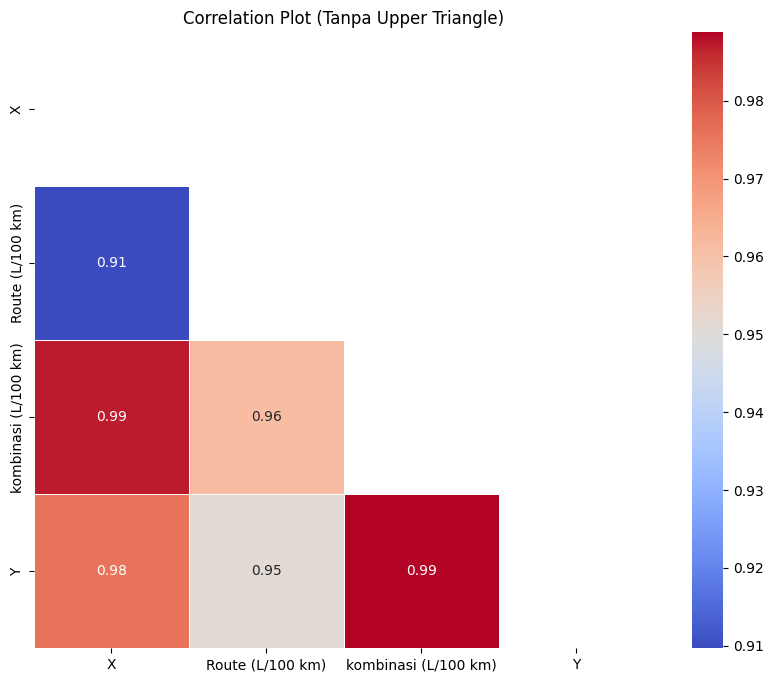

In [9]:
# Membuat mask untuk upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Membuat heatmap tanpa upper triangle
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Plot (Tanpa Upper Triangle)')
plt.show()

Untuk menunjukkan korelasi antar variabel dalam dataset, kode tersebut menampilkan heatmap, tetapi mask hanya menampilkan lower triangle.

Membuat Model Regresi Sederhana

<Axes: xlabel='X', ylabel='Y'>

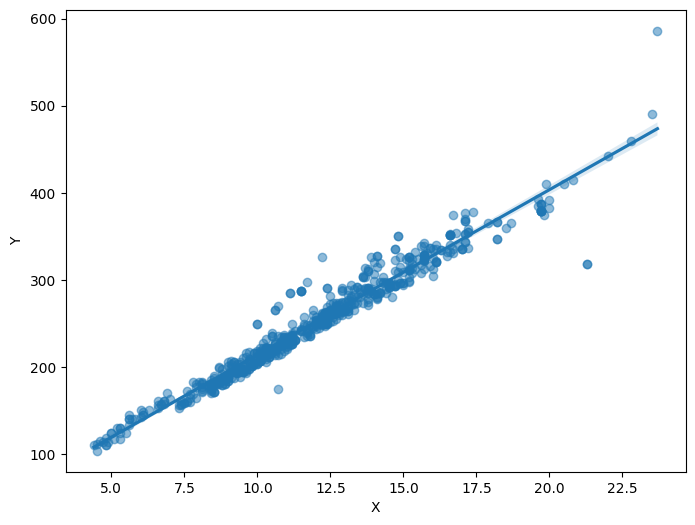

In [10]:
# Plot scatterplot dengan regresi
plt.figure(figsize=(8, 6))
sns.regplot(x="X", y="Y", data=data, scatter_kws={"alpha": 0.5})

Di sini, "x" berarti "X" dan "y" berarti "Y", yang menunjukkan plot yang menunjukkan hubungan antara konsumsi bahan bakar kota (X) dan emisi CO2 (Y). Garis regresi secara otomatis ditambahkan untuk menunjukkan tren hubungan linear antara kedua variabel. Oleh karena itu, dari plot ini, dapat dilihat bahwa x dan y sangat berkorelasi positif, dengan tingkat konsumsi bahan bakar

Membuat Model Regresi Sederhana #2

In [11]:
from sklearn.linear_model import LinearRegression

# Pisahkan variabel independen (X) dan dependen (Y)
X = data[["X"]]  # Perlu diubah ke bentuk 2D
Y = data["Y"]


# Menambahkan konstanta ke model (intercept)
X = sm.add_constant(X)

In [12]:
# Membuat model regresi linear
model = sm.OLS(Y, X).fit()

# Melihat ringkasan model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                 1.265e+04
Date:                Mon, 10 Mar 2025   Prob (F-statistic):               0.00
Time:                        06:29:52   Log-Likelihood:                -2618.3
No. Observations:                 642   AIC:                             5241.
Df Residuals:                     640   BIC:                             5250.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.7691      2.096     11.815      0.000      20.652      28.886
X             18.9382      0.168    112.454      0.000      18.608      19.269
==============================================================================
Omnibus:                      176.815   Durbin-Watson:                   1.308
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8794.363
Skew:                           0.308   Prob(JB):                         0.00
Kurtosis:                      21.121   Cond. No.                         46.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Untuk memodelkan hubungan antara konsumsi bahan bakar kota (X) dan emisi CO2 (Y), output dari kode tersebut menunjukkan regresi linear sederhana dengan OLS (Ordinary Least Squares) dari model statistik. Intinya, konsumsi bahan bakar kota (X) sangat berkorelasi positif dengan emisi CO2 (Y), sehingga model ini cukup baik untuk memprediksi.

In [13]:
print(model)
prediksi = model.predict(X)
prediksi

,0
0,178.168794
1,193.319386
2,234.983513
3,263.390873
4,286.116761
...,...
637,208.469978
638,227.408218
639,216.045274
640,214.151450


Baris pertama (178.168794) menunjukkan bahwa model dapat digunakan untuk memperkirakan emisi CO2 dari kendaraan berdasarkan konsumsi bahan bakarnya. Ketika konsumsi bahan bakar X = 8.1, model memperkirakan emisi CO2 sekitar 178.17 (hasil yang dibulatkan) g/km. Ini menunjukkan bahwa prediksi ini meningkat seiring dengan peningkatan konsumsi bahan bakar, sesuai dengan hubungan positif antara X dan Y. Temuan ini menunjukkan bahwa model ini dapat digunakan untuk memperkirakan emisi dari kendaraan

Visualisasi Hasil Prediksi

In [14]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, Y)

LinearRegression()

**In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.**

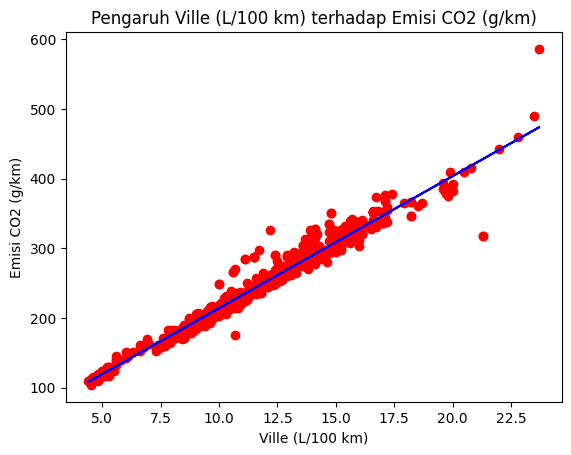

In [15]:
plt.scatter(X.X, Y, color = 'red')
plt.plot(X.X, lin_reg.predict(X), color = 'blue')
plt.title('Pengaruh Ville (L/100 km) terhadap Emisi CO2 (g/km)')
plt.xlabel('Ville (L/100 km)')
plt.ylabel('Emisi CO2 (g/km)')
plt.show()

Kode ini membuat visualisasi regresi linear antara konsumsi bahan bakar kota (X) dan emisi CO2 (Y). Data asli dari dataset (scatter plot) diwakili oleh titik merah, sedangkan garis biru adalah model regresi linear yang menunjukkan hubungan antara X dan Y. Oleh karena itu, garis biru yang mengikuti pola titik merah menunjukkan bahwa konsumsi bahan bakar yang lebih besar cenderung meningkatkan emisi CO2.

# **Evaluasi**

In [16]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Evaluasi model
mse = mean_squared_error(Y, prediksi)
mae = mean_absolute_error(Y, prediksi)
r2 = r2_score(Y, prediksi)

# Cetak hasil evaluasi
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R²): {r2:.4f}")

Mean Squared Error (MSE): 204.1479
Mean Absolute Error (MAE): 9.0293
R-squared (R²): 0.9518


Setelah melakukan evaluasi terhadap model regresi linear menggunakan metrik MSE, MAE, dan R2, ditemukan bahwa selisih antara nilai prediksi dan nilai aktual rata-rata sekitar 9 satuan CO2 g/km (MAE). Meskipun ada sedikit kesalahan, nilai ini relatif kecil dibandingkan dengan skala data, dan R2 mencapai tingkat akurasi 95%.

In [17]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, Y)

LinearRegression()

**In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.**

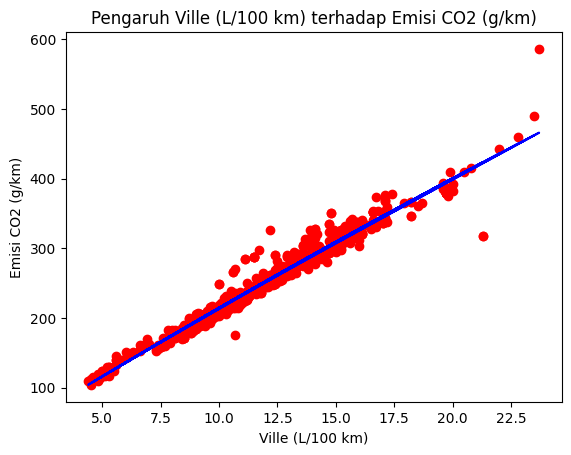

In [18]:
plt.scatter(X.X, Y, color = 'red')
plt.plot(X.X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.title('Pengaruh Ville (L/100 km) terhadap Emisi CO2 (g/km)')
plt.xlabel('Ville (L/100 km)')
plt.ylabel('Emisi CO2 (g/km)')
plt.show()

Untuk melihat hubungan antara konsumsi bahan bakar kota (X) dan emisi CO2 (Y), kode ini menggunakan regresi polinomial. Di sini, titik merah menunjukkan data asli dari dataset (scatter plot), dan garis biru menunjukkan hasil regresi polinomial yang lebih fleksibel daripada regresi linear.

In [19]:
Y_poly = lin_reg_2.predict(X_poly)
Y_poly

array([177.55649707, 193.16562068, 235.63198483, 264.20057737,
       286.83025876, 233.71629137, 239.45920152, 239.45920152,
       258.51188027, 214.48290248, 224.1169729 , 229.88073422,
       239.45920152, 325.95053915, 322.25120965, 314.8358697 ,
       206.75062473, 216.41249672, 220.26751497, 216.41249672,
       224.1169729 , 216.41249672, 214.48290248, 231.79920784,
       231.79920784, 231.79920784, 264.20057737, 227.96087052,
       247.09695396, 216.41249672, 226.03961675, 226.03961675,
       252.81067247, 271.76604575, 249.00291687, 269.87676378,
       277.42555122, 346.19746086, 346.19746086, 346.19746086,
       329.64430835, 222.19293897, 233.71629137, 233.71629137,
       258.51188027, 249.00291687, 260.40950272, 260.40950272,
       327.79811879, 264.20057737, 264.20057737, 327.79811879,
       329.64430835, 348.02974964, 348.02974964, 204.8140801 ,
       193.16562068, 206.75062473, 189.27168024, 189.27168024,
       277.42555122, 312.97855952, 298.07003524, 303.67

Hasil ini menunjukkan array nilai Y prediksi yang dibangun berdasarkan model regresi polinomial.  Array Y_poly berisi nilai-nilai prediksi untuk variabel dependen, atau emisi CO2, yang didasarkan pada model regresi polinomial. Nilai-nilai dalam array adalah estimasi emisi CO2 yang diprediksi oleh model setelah input X diproses melalui transformasi polinomial.



In [20]:
# Evaluasi model
mse_poly = mean_squared_error(Y, Y_poly)
mae_poly = mean_absolute_error(Y, Y_poly)
r2_poly = r2_score(Y, Y_poly)

# Cetak hasil evaluasi
print(f"Mean Squared Error (MSE Poly): {mse_poly:.4f}")
print(f"Mean Absolute Error (MAE Poly): {mae_poly:.4f}")
print(f"R-squared (R² Poly): {r2_poly:.4f}")

Mean Squared Error (MSE Poly): 202.7943
Mean Absolute Error (MAE Poly): 9.0976
R-squared (R² Poly): 0.9521


Setelah melakukan evaluasi terhadap model regresi polinomial menggunakan metrik MSE, MAE, dan R2, ditemukan bahwa selisih antara nilai prediksi dan nilai aktual rata-rata adalah sekitar 9 satuan CO2 g/km (MAE). Meskipun masih ada kesalahan, nilai ini relatif kecil dibandingkan dengan skala data.  Sementara R2 memiliki akurasi 95%.
